# Reading the signals etc

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.integrate import simps
from scipy.fft import fftshift
from tsfel.feature_extraction import features as tsfelf

In [2]:
from os import listdir
from os.path import isfile, join


In [3]:
def bpf(arr, fs, lf, hf, order):
    wbut = [lf, hf]
    bbut, abut = signal.butter(order, wbut, btype ='bandpass', fs = fs)

    return signal.filtfilt(bbut, abut, arr)

def hpf(arr, fs, lf, order):
    wbut = lf
    bbut, abut = signal.butter(order, wbut, btype ='highpass', fs =fs)

    return signal.filtfilt(bbut, abut, arr)


In [4]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\yllas'
timestamps = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [5]:
timestamps

['2021_16_06_56-Dec-18.wav',
 '2021_16_07_06-Dec-18.wav',
 '2021_16_07_16-Dec-18.wav',
 '2021_16_07_27-Dec-18.wav',
 '2021_16_07_37-Dec-18.wav',
 '2021_16_07_47-Dec-18.wav',
 '2021_16_07_57-Dec-18.wav',
 '2021_16_08_07-Dec-18.wav',
 '2021_16_08_18-Dec-18.wav',
 '2021_16_08_28-Dec-18.wav',
 '2021_16_08_38-Dec-18.wav',
 '2021_16_08_48-Dec-18.wav',
 '2021_16_08_58-Dec-18.wav',
 '2021_16_09_09-Dec-18.wav',
 '2021_16_09_19-Dec-18.wav',
 '2021_16_09_29-Dec-18.wav',
 '2021_16_09_39-Dec-18.wav',
 '2021_16_09_49-Dec-18.wav',
 '2021_16_10_00-Dec-18.wav',
 '2021_16_10_10-Dec-18.wav',
 '2021_16_10_20-Dec-18.wav',
 '2021_16_10_30-Dec-18.wav',
 '2021_16_10_40-Dec-18.wav',
 '2021_16_10_51-Dec-18.wav',
 '2021_16_11_01-Dec-18.wav',
 '2021_16_11_11-Dec-18.wav',
 '2021_16_11_21-Dec-18.wav',
 '2021_16_11_31-Dec-18.wav',
 '2021_16_11_42-Dec-18.wav',
 '2021_16_11_52-Dec-18.wav',
 '2021_16_12_02-Dec-18.wav',
 '2021_16_12_12-Dec-18.wav',
 '2021_16_12_22-Dec-18.wav',
 '2021_16_12_33-Dec-18.wav',
 '2021_16_12_4

In [15]:
fs = 44100
def read_data(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\yllas\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data
def read_data2(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\22_Nov_2021_gravel_and_dry_asphalt\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data

def read_timestamps(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_timestamps\\'+ str(r_id)
    time = pd.read_csv(link)
    return time


In [20]:
s = read_data2('2021_10_47_35-Nov-22.wav')

len(s)

409600

## Extracting features from the signals

In [34]:
def get_features(data, surface):
    columns = ["Surface"]
    features = ["RMS", "RMSf", "Spec", "Specf", "ZC", "ZCf", "Specslo", "Specslof", "Specspr", "Specsprf", "STD", "STDf"]

    df = pd.DataFrame(columns = columns)
    for i in range(len(data)):
        r_id = data[i]
        df.loc[i, "ID"] = r_id
        df.loc[i, "Surface"] = surface
        
        #Read the signals
        sig = read_data(r_id)
        
        s_f = hpf(sig, fs, 65, 2)
        df.loc[i, "RMS"] = tsfelf.rms(sig)
        df.loc[i, "RMS_filt"] = tsfelf.rms(s_f)

        df.loc[i, "Zero-Cross"] = tsfelf.zero_cross(sig)
        df.loc[i, "Zero-Cross_filt"] = tsfelf.zero_cross(s_f)
        
        df.loc[i, "Spectral_centroid"] = tsfelf.spectral_centroid(sig, fs)
        df.loc[i, "Spectral_centroid_filt"] = tsfelf.spectral_centroid(s_f, fs)
        
        df.loc[i, "Spectral_slope"] = tsfelf.spectral_slope(sig, fs)
        df.loc[i, "Spectral_slope_filt"] = tsfelf.spectral_slope(s_f, fs) 
        
        df.loc[i, "Spectral_spread"] = tsfelf.spectral_spread(sig, fs)
        df.loc[i, "Spectral_spread_filt"] = tsfelf.spectral_spread(s_f, fs) 
        
        df.loc[i, "STD"] = np.std(sig)
        
        df.loc[i, "STD_filt"] = np.std(s_f)
        
        print(i, end=',')
    return df, features
        

In [35]:

waspdf, features = get_features(wasp_files, "Wet Asphalt")

graveldf, _ = get_features(gravel_files, "Wet Gravel")



0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,

In [36]:
def get_features2(data, surface):
    columns = ["Surface"]
    features = ["RMS", "RMSf", "Spec", "Specf", "ZC", "ZCf", "Specslo", "Specslof", "Specspr", "Specsprf", "STD", "STDf"]

    df = pd.DataFrame(columns = columns)
    for i in range(len(data)):
        r_id = data[i]
        df.loc[i, "ID"] = r_id
        df.loc[i, "Surface"] = surface
        #Read the signals
        sig = read_data2(r_id)
        
        s_f = hpf(sig, fs, 65, 2)
        df.loc[i, "RMS"] = tsfelf.rms(sig)
        df.loc[i, "RMS_filt"] = tsfelf.rms(s_f)

        df.loc[i, "Zero-Cross"] = tsfelf.zero_cross(sig)
        df.loc[i, "Zero-Cross_filt"] = tsfelf.zero_cross(s_f)
        
        df.loc[i, "Spectral_centroid"] = tsfelf.spectral_centroid(sig, fs)
        df.loc[i, "Spectral_centroid_filt"] = tsfelf.spectral_centroid(s_f, fs)
        
        df.loc[i, "Spectral_slope"] = tsfelf.spectral_slope(sig, fs)
        df.loc[i, "Spectral_slope_filt"] = tsfelf.spectral_slope(s_f, fs) 
        
        df.loc[i, "Spectral_spread"] = tsfelf.spectral_spread(sig, fs)
        df.loc[i, "Spectral_spread_filt"] = tsfelf.spectral_spread(s_f, fs) 
        
        df.loc[i, "STD"] = np.std(sig)
        
        df.loc[i, "STD_filt"] = np.std(s_f)
        
        print(i, end=',')
    return df, features
        

In [37]:
graveldf2, _ = get_features2(gravel_files2, "Dry Gravel")

drydf, _ = get_features2(dry_files, "Dry Asphalt")

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,

In [38]:
#Adding all of the dataframes together.

alldf = pd.concat([waspdf, graveldf, graveldf2, drydf])

alldf

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Wet Asphalt,2021_14_54_08-Nov-10.wav,29.546131,1023.227026,7470.0,8387.0,936.116277,1018.407771,-1.136291e-09,-1.127022e-09,1641.800213,1592.380153,1165.214212,1023.227026
1,Wet Asphalt,2021_14_54_18-Nov-10.wav,23.158067,1283.379764,8372.0,9884.0,869.158982,980.920178,-1.143832e-09,-1.131245e-09,1428.056723,1453.218214,1536.434588,1283.379763
2,Wet Asphalt,2021_14_54_28-Nov-10.wav,22.356680,1559.749380,9023.0,10466.0,978.265482,1050.050716,-1.131544e-09,-1.123459e-09,1688.413169,1527.067657,1827.613507,1559.749375
3,Wet Asphalt,2021_14_54_39-Nov-10.wav,18.413845,1917.039422,8206.0,9659.0,868.511381,999.818919,-1.143905e-09,-1.129116e-09,1434.742860,1557.996016,2310.517279,1917.039352
4,Wet Asphalt,2021_14_54_49-Nov-10.wav,17.320115,1903.750157,7371.0,9141.0,845.770818,980.018609,-1.146466e-09,-1.131346e-09,1441.429068,1511.096731,2390.523797,1903.750146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Dry Asphalt,2021_12_11_50-Nov-22.wav,36.534334,888.469033,22574.0,23509.0,1716.408648,1765.754351,-1.121796e-09,-1.115849e-09,2077.639124,2094.478887,908.634971,888.469033
665,Dry Asphalt,2021_12_11_59-Nov-22.wav,29.227326,2105.265017,22609.0,23344.0,1726.941985,1789.627193,-1.120526e-09,-1.112972e-09,2049.099301,2059.192042,2193.910625,2105.265017
666,Dry Asphalt,2021_12_12_09-Nov-22.wav,12.354906,3569.975285,19416.0,20806.0,1423.374044,1493.428487,-1.157110e-09,-1.148668e-09,1679.621230,1625.419419,3908.569348,3569.975225
667,Dry Asphalt,2021_12_12_19-Nov-22.wav,11.684496,4516.976878,21197.0,22303.0,1498.312835,1572.473819,-1.148079e-09,-1.139142e-09,1631.718617,1628.609637,4845.935116,4516.976775


In [39]:
alldf.to_csv(r'C:\\Users\\Owner\\Downloads\\CapstoneData\\DataFrame_01_12.csv', index = False)

# Data analysis. 

### Different surfaces and their features boxplotted.

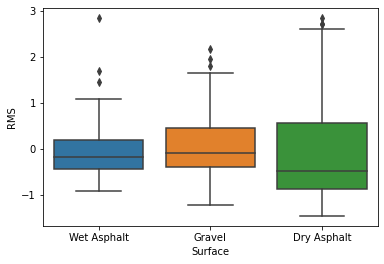

In [141]:
fig = sns.boxplot(data=alldf, x="Surface", y="RMS")

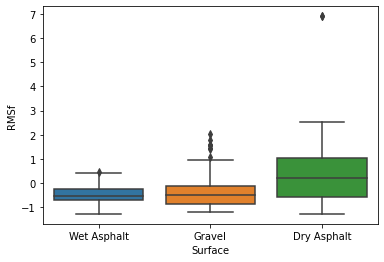

In [140]:
fig = sns.boxplot(data=alldf, x="Surface", y="RMSf")

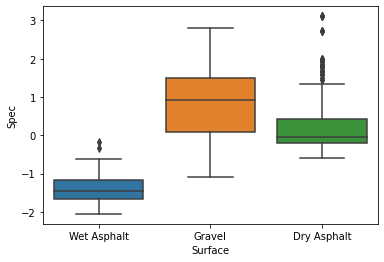

In [139]:
fig = sns.boxplot(data=alldf, x="Surface", y="Spec")

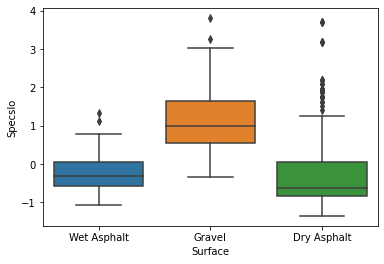

In [138]:
fig = sns.boxplot(data=alldf, x="Surface", y="Specslo")

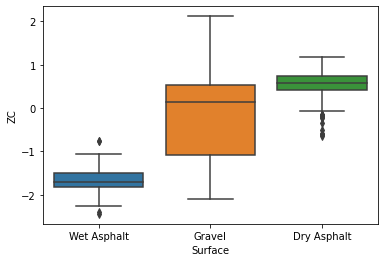

In [137]:
fig = sns.boxplot(data=alldf, x="Surface", y="ZC")

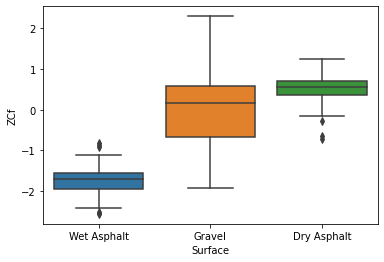

In [136]:
fig = sns.boxplot(data=alldf, x="Surface", y="ZCf")

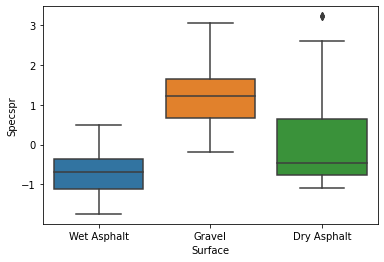

In [135]:
fig = sns.boxplot(data=alldf, x="Surface", y="Specspr")

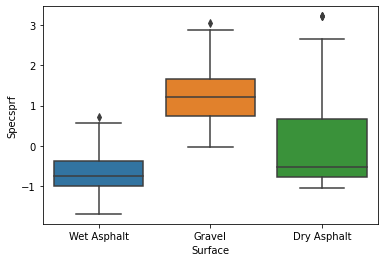

In [134]:
fig = sns.boxplot(data=alldf, x="Surface", y="Specsprf")

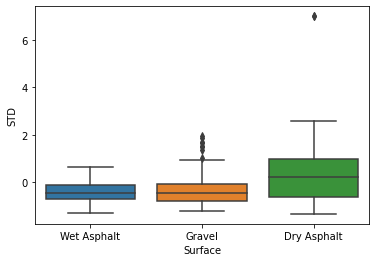

In [165]:
fig = sns.boxplot(data=alldf, x="Surface", y="STD")

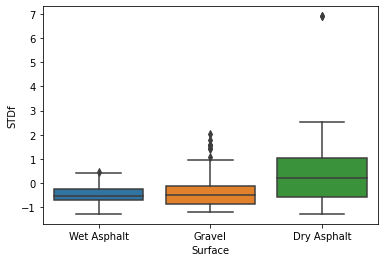

In [133]:
fig = sns.boxplot(data=alldf, x="Surface", y="STDf")

In [107]:
alldf

,Surface,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf,STD,STDf
0,Wet Asphalt,0.636991,-0.909537,-1.776822,-1.970302,-1.436763,-1.451934,-0.277799,-0.296562,-0.671288,-0.752975,-0.932151,-0.909537
1,Wet Asphalt,0.179694,-0.795452,-1.609772,-1.678002,-1.602796,-1.544345,-0.489709,-0.406159,-1.160694,-1.059778,-0.775480,-0.795452
2,Wet Asphalt,0.122326,-0.674255,-1.489207,-1.564362,-1.332246,-1.373932,-0.144402,-0.204052,-0.564559,-0.896966,-0.652589,-0.674255
3,Wet Asphalt,-0.159926,-0.517573,-1.640515,-1.721935,-1.604402,-1.497758,-0.491759,-0.350907,-1.145385,-0.828780,-0.448782,-0.517573
4,Wet Asphalt,-0.238222,-0.523400,-1.795157,-1.823078,-1.660792,-1.546567,-0.563729,-0.408794,-1.130075,-0.932176,-0.415016,-0.523400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Dry Asphalt,1.137249,-0.968632,1.020432,0.982384,0.498121,0.390345,0.129511,-0.006529,0.326647,0.353976,-1.040439,-0.968632
665,Dry Asphalt,0.614169,-0.435030,1.026914,0.950166,0.524241,0.449193,0.165181,0.068150,0.261300,0.276181,-0.497996,-0.435030
666,Dry Asphalt,-0.593662,0.207291,0.435572,0.454602,-0.228514,-0.280964,-0.862822,-0.858418,-0.584690,-0.680135,0.225667,0.207291
667,Dry Asphalt,-0.641654,0.622580,0.765412,0.746903,-0.042689,-0.086110,-0.609049,-0.611148,-0.694372,-0.673102,0.621277,0.622580


# MACHINE LEARNING PART

### This time I split the gravel instances into two: wet and dry.


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [206]:
features

['RMS',
 'RMSf',
 'Spec',
 'Specf',
 'ZC',
 'ZCf',
 'Specslo',
 'Specslof',
 'Specspr',
 'Specsprf',
 'STD',
 'STDf']

In [207]:
fts=['RMS',
 'RMSf',
 'Spec',
 'Specf',
 'ZC',
 'ZCf',
 'Specslo',
 'Specslof',
 'Specspr',
 'Specsprf',
 'STD',
 'STDf',
'Surface']

In [229]:
graveldf2["Surface"] = "DryGrav"

graveldf["Surface"] = "WetGrav"

waspdf["Surface"] = "WetAsp"

drydf["Surface"] = "DryAsp"

In [230]:
graveldf22 = graveldf2[fts]

graveldf12 = graveldf[fts]

waspdf2 = waspdf[fts]

drydf2 = drydf[fts]

In [231]:
tdrydf2 = drydf2.dropna()

tdrydf2 = tdrydf2[0:105]

alldf = pd.concat([waspdf, graveldf, graveldf2, tdrydf])

alldf = pd.concat([waspdf2, graveldf12, graveldf22, tdrydf2])

alldf

,RMS,RMSf,Spec,Specf,ZC,ZCf,Specslo,Specslof,Specspr,Specsprf,STD,STDf,Surface
0,29.546131,1023.227026,936.116277,1018.407771,7470.0,8387.0,-1.136291e-09,-1.127022e-09,1641.800213,1592.380153,1165.214212,1023.227026,WetAsp
1,23.158067,1283.379764,869.158982,980.920178,8372.0,9884.0,-1.143832e-09,-1.131245e-09,1428.056723,1453.218214,1536.434588,1283.379763,WetAsp
2,22.356680,1559.749380,978.265482,1050.050716,9023.0,10466.0,-1.131544e-09,-1.123459e-09,1688.413169,1527.067657,1827.613507,1559.749375,WetAsp
3,18.413845,1917.039422,868.511381,999.818919,8206.0,9659.0,-1.143905e-09,-1.129116e-09,1434.742860,1557.996016,2310.517279,1917.039352,WetAsp
4,17.320115,1903.750157,845.770818,980.018609,7371.0,9141.0,-1.146466e-09,-1.131346e-09,1441.429068,1511.096731,2390.523797,1903.750146,WetAsp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,8.015358,5411.595677,1411.974206,1464.138470,20532.0,21396.0,-1.158484e-09,-1.152197e-09,1508.710934,1467.133287,5686.370703,5411.595274,DryAsp
150,10.389646,5148.698010,1426.624362,1482.212794,21115.0,22032.0,-1.156718e-09,-1.150019e-09,1534.212795,1505.584996,5419.202908,5148.697873,DryAsp
151,5.727104,5511.432614,1430.342826,1484.987545,21158.0,22068.0,-1.156270e-09,-1.149685e-09,1515.618864,1462.701347,5806.613661,5511.432586,DryAsp
153,6.959138,5811.278444,1409.120273,1476.886269,20752.0,21879.0,-1.158828e-09,-1.150661e-09,1494.198522,1514.366795,6142.207515,5811.278346,DryAsp


In [233]:

# post processing, standardize the data

#remove na values
alldf = alldf.dropna()

scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object

#with these 3 features only, we can get almost perfect score...

alldf[features] = scaler.fit_transform(alldf[features])

alldf

,RMS,RMSf,Spec,Specf,ZC,ZCf,Specslo,Specslof,Specspr,Specsprf,STD,STDf,Surface
0,1.268606,-1.064313,-1.084118,-1.128411,-1.181980,-1.340856,-0.333712,-0.363234,-0.558278,-0.643032,-1.146502,-1.064313,WetAsp
1,0.601704,-0.932870,-1.242590,-1.217249,-1.036518,-1.087577,-0.561859,-0.477827,-1.045452,-0.947470,-0.960707,-0.932870,WetAsp
2,0.518041,-0.793233,-0.984361,-1.053425,-0.931534,-0.989107,-0.190094,-0.266507,-0.452035,-0.785913,-0.814973,-0.793233,WetAsp
3,0.106417,-0.612711,-1.244123,-1.172463,-1.063288,-1.125645,-0.564066,-0.420057,-1.030212,-0.718253,-0.573281,-0.612711,WetAsp
4,-0.007766,-0.619426,-1.297944,-1.219385,-1.197945,-1.213286,-0.641551,-0.480583,-1.014973,-0.820852,-0.533238,-0.619426,WetAsp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.979165,1.152927,0.042125,-0.072129,0.924475,0.860158,-1.005123,-1.046506,-0.861621,-0.917029,1.116324,1.152927,DryAsp
150,-0.731294,1.020097,0.076799,-0.029297,1.018493,0.967764,-0.951710,-0.987388,-0.803496,-0.832910,0.982607,1.020097,DryAsp
151,-1.218054,1.203370,0.085599,-0.022722,1.025428,0.973854,-0.938153,-0.978312,-0.845876,-0.926724,1.176505,1.203370,DryAsp
153,-1.089432,1.354868,0.035371,-0.041920,0.959954,0.941877,-1.015528,-1.004810,-0.894698,-0.813698,1.344469,1.354868,DryAsp


In [234]:
X = alldf[features]
y = alldf["Surface"]

X

,RMS,RMSf,Spec,Specf,ZC,ZCf,Specslo,Specslof,Specspr,Specsprf,STD,STDf
0,1.268606,-1.064313,-1.084118,-1.128411,-1.181980,-1.340856,-0.333712,-0.363234,-0.558278,-0.643032,-1.146502,-1.064313
1,0.601704,-0.932870,-1.242590,-1.217249,-1.036518,-1.087577,-0.561859,-0.477827,-1.045452,-0.947470,-0.960707,-0.932870
2,0.518041,-0.793233,-0.984361,-1.053425,-0.931534,-0.989107,-0.190094,-0.266507,-0.452035,-0.785913,-0.814973,-0.793233
3,0.106417,-0.612711,-1.244123,-1.172463,-1.063288,-1.125645,-0.564066,-0.420057,-1.030212,-0.718253,-0.573281,-0.612711
4,-0.007766,-0.619426,-1.297944,-1.219385,-1.197945,-1.213286,-0.641551,-0.480583,-1.014973,-0.820852,-0.533238,-0.619426
...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.979165,1.152927,0.042125,-0.072129,0.924475,0.860158,-1.005123,-1.046506,-0.861621,-0.917029,1.116324,1.152927
150,-0.731294,1.020097,0.076799,-0.029297,1.018493,0.967764,-0.951710,-0.987388,-0.803496,-0.832910,0.982607,1.020097
151,-1.218054,1.203370,0.085599,-0.022722,1.025428,0.973854,-0.938153,-0.978312,-0.845876,-0.926724,1.176505,1.203370
153,-1.089432,1.354868,0.035371,-0.041920,0.959954,0.941877,-1.015528,-1.004810,-0.894698,-0.813698,1.344469,1.354868


In [241]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=None)

x_train

,RMS,RMSf,Spec,Specf,ZC,ZCf,Specslo,Specslof,Specspr,Specsprf,STD,STDf
16,0.388380,-0.835925,-0.572947,-0.507944,-0.840419,-0.760191,0.402207,0.437122,0.223255,-0.026962,-0.752651,-0.835925
14,0.103893,-0.380286,1.217216,1.186679,0.360851,0.280845,0.805041,0.690924,1.632193,1.604490,-0.461806,-0.380286
39,-0.557905,0.651519,0.002278,-0.099367,0.751598,0.649514,-1.066505,-1.084099,-0.773495,-0.693268,0.567606,0.651519
113,-0.618309,0.309795,-0.045760,-0.196808,0.749341,0.644946,-1.140505,-1.218589,-0.735563,-0.892010,0.214775,0.309795
67,0.384418,-0.548410,-1.004756,-0.974927,-1.280836,-1.474010,-0.219456,-0.165251,-0.469034,-0.364104,-0.566226,-0.548410
...,...,...,...,...,...,...,...,...,...,...,...,...
53,-1.072251,1.628227,0.983221,0.964862,-0.080534,-0.247540,0.444585,0.384767,1.668718,1.819292,1.579066,1.628226
71,-0.352499,-0.302677,-1.353899,-1.275171,-1.347761,-1.440172,-0.722108,-0.552543,-0.993764,-0.760854,-0.181304,-0.302677
106,0.896456,-0.905924,0.119161,0.162234,-0.295824,-0.389999,1.398614,1.301600,0.603217,0.665586,-0.985525,-0.905924
98,-1.395480,1.532340,0.246579,0.029288,1.025912,0.959304,-0.690172,-0.906528,-0.333280,-0.846893,1.495831,1.532340


In [242]:
# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)



# Extra trees classifier

forestclf = ExtraTreesClassifier(n_estimators = 500)

forestclf.fit(x_train, y_train)

y_pred_forest = forestclf.predict(x_test)


# SVC

#Create a svm Classifier
clf = sklearn.svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(x_test)


# Random Forest

rforestclf = RandomForestClassifier(n_estimators = 500)

rforestclf.fit(x_train, y_train)

y_pred_rforest = rforestclf.predict(x_test)


# Decision tree

treeclf = tree.DecisionTreeClassifier()
treeclf = clf.fit(x_train, y_train)
y_pred_tree = rforestclf.predict(x_test)

# Naive bayes

gnb = GaussianNB()
nbclf = gnb.fit(x_train, y_train)
y_pred_nb = nbclf.predict(x_test)

KNN confusion matrix


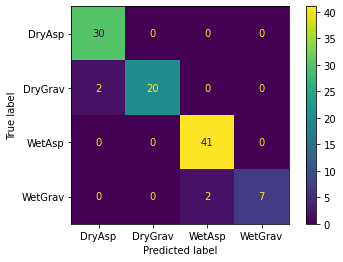

SVC confusion matrix


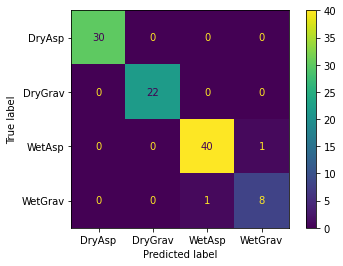

Decision tree classifier confusion matrix


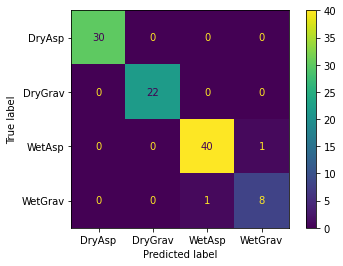

Random forest classifier confusion matrix


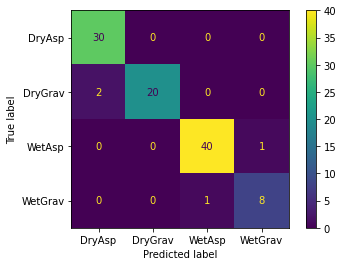

Extra trees classifier confusion matrix


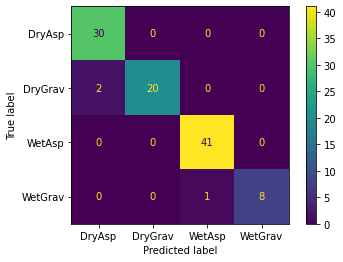

NaiveBayes classifier confusion matrix


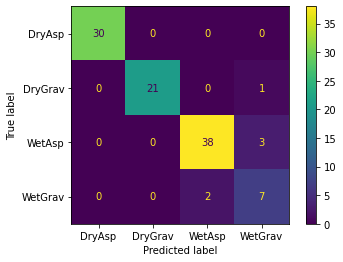

In [243]:
#%matplotlib inline

print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)
plt.show()


print("SVC confusion matrix")
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

print("Decision tree classifier confusion matrix")
plot_confusion_matrix(treeclf, x_test, y_test)
plt.show()

print("Random forest classifier confusion matrix")
plot_confusion_matrix(rforestclf, x_test, y_test)
plt.show()

print("Extra trees classifier confusion matrix")
plot_confusion_matrix(forestclf, x_test, y_test)
plt.show()

print("NaiveBayes classifier confusion matrix")
plot_confusion_matrix(nbclf, x_test, y_test)
plt.show()

In [244]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy knn: ", np.round(accuracy_score(y_test, y_pred_knn),2))
print("Accuracy svc: ", np.round(accuracy_score(y_test, y_pred_svc),2))
print("Accuracy Tree : ", np.round(accuracy_score(y_test, y_pred_tree),2))
print("Accuracy Random forest : ", np.round(accuracy_score(y_test, y_pred_rforest),2))
print("Accuracy Extra Trees : ", np.round(accuracy_score(y_test, y_pred_forest),2))

print("----------")

print("Precision knn: ", np.round(precision_score(y_test, y_pred_knn, average='macro'),2))
print("Precision svc: ", np.round(precision_score(y_test, y_pred_svc, average = 'macro'),2))
print("Precision Tree: ", np.round(precision_score(y_test, y_pred_tree, average = 'macro'),2))
print("Precision Random Forest: ", np.round(precision_score(y_test, y_pred_rforest, average = 'macro'),2))
print("Precision trees: ", np.round(precision_score(y_test, y_pred_forest, average = 'macro'),2))

print("----------")

print("Recall knn: ", np.round(recall_score(y_test, y_pred_knn, average = 'macro'),2))
print("Recall svc: ", np.round(recall_score(y_test, y_pred_svc, average = 'macro'),2))     
print("Recall tree: ", np.round(recall_score(y_test, y_pred_tree, average = 'macro'),2))  
print("Recall forest: ", np.round(recall_score(y_test, y_pred_rforest, average = 'macro'),2))     
print("Recall trees: ", np.round(recall_score(y_test, y_pred_forest, average = 'macro'),2)) 

print("----------")
 
print("F1 knn: ", np.round(f1_score(y_test, y_pred_knn, average = 'macro'),2))
print("F1 svc: ", np.round(f1_score(y_test, y_pred_svc, average = 'macro'),2))            
print("F1 tree: ", np.round(f1_score(y_test, y_pred_tree, average = 'macro'),2))  
print("F1 forest: ", np.round(f1_score(y_test, y_pred_rforest, average = 'macro'),2))  

print("F1 trees: ", np.round(f1_score(y_test, y_pred_forest, average = 'macro'),2))  

Accuracy knn:  0.96
Accuracy svc:  0.98
Accuracy Tree :  0.96
Accuracy Random forest :  0.96
Accuracy Extra Trees :  0.97
----------
Precision knn:  0.97
Precision svc:  0.97
Precision Tree:  0.95
Precision Random Forest:  0.95
Precision trees:  0.98
----------
Recall knn:  0.92
Recall svc:  0.97
Recall tree:  0.94
Recall forest:  0.94
Recall trees:  0.95
----------
F1 knn:  0.94
F1 svc:  0.97
F1 tree:  0.95
F1 forest:  0.95
F1 trees:  0.96


### Machine learning with gravel, wet asphalt and dry asphalt. They all can clearly be recognized with multiple different ML methods. Accuracy is good, considering that some of the outliers are the ones that are predicted incorrectly. Dry asphalt and gravel are mixed together a little bit.

In [245]:
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy knn:', round(np.mean(scores)*100,1), '%')


model = sklearn.svm.SVC(kernel='linear') 
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy svc:', round(np.mean(scores)*100,1), '%')


model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
print('Accuracy tree:', round(np.mean(scores)*100,1), '%')


# model = RandomForestClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
# print('Accuracy forest:', round(np.mean(scores)*100,1), '%')



# model = ExtraTreesClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

# print('Accuracy extra trees:', round(np.mean(scores)*100,1), '%')

Accuracy knn: 98.0 %
Accuracy svc: 98.0 %
Accuracy tree: 94.1 %


In [126]:
X

,RMS,RMSf,Spec,Specf,ZC,ZCf,Specslo,Specslof,Specspr,Specsprf,STD,STDf
0,0.636991,-0.909537,-1.436763,-1.451934,-1.776822,-1.970302,-0.277799,-0.296562,-0.671288,-0.752975,-0.932151,-0.909537
1,0.179694,-0.795452,-1.602796,-1.544345,-1.609772,-1.678002,-0.489709,-0.406159,-1.160694,-1.059778,-0.775480,-0.795452
2,0.122326,-0.674255,-1.332246,-1.373932,-1.489207,-1.564362,-0.144402,-0.204052,-0.564559,-0.896966,-0.652589,-0.674255
3,-0.159926,-0.517573,-1.604402,-1.497758,-1.640515,-1.721935,-0.491759,-0.350907,-1.145385,-0.828780,-0.448782,-0.517573
4,-0.238222,-0.523400,-1.660792,-1.546567,-1.795157,-1.823078,-0.563729,-0.408794,-1.130075,-0.932176,-0.415016,-0.523400
...,...,...,...,...,...,...,...,...,...,...,...,...
664,1.137249,-0.968632,0.498121,0.390345,1.020432,0.982384,0.129511,-0.006529,0.326647,0.353976,-1.040439,-0.968632
665,0.614169,-0.435030,0.524241,0.449193,1.026914,0.950166,0.165181,0.068150,0.261300,0.276181,-0.497996,-0.435030
666,-0.593662,0.207291,-0.228514,-0.280964,0.435572,0.454602,-0.862822,-0.858418,-0.584690,-0.680135,0.225667,0.207291
667,-0.641654,0.622580,-0.042689,-0.086110,0.765412,0.746903,-0.609049,-0.611148,-0.694372,-0.673102,0.621277,0.622580


In [127]:
features

['RMS',
 'RMSf',
 'Spec',
 'Specf',
 'ZC',
 'ZCf',
 'Specslo',
 'Specslof',
 'Specspr',
 'Specsprf',
 'STD',
 'STDf']

In [128]:
alldf

,Surface,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf,STD,STDf
0,Wet Asphalt,0.636991,-0.909537,-1.776822,-1.970302,-1.436763,-1.451934,-0.277799,-0.296562,-0.671288,-0.752975,-0.932151,-0.909537
1,Wet Asphalt,0.179694,-0.795452,-1.609772,-1.678002,-1.602796,-1.544345,-0.489709,-0.406159,-1.160694,-1.059778,-0.775480,-0.795452
2,Wet Asphalt,0.122326,-0.674255,-1.489207,-1.564362,-1.332246,-1.373932,-0.144402,-0.204052,-0.564559,-0.896966,-0.652589,-0.674255
3,Wet Asphalt,-0.159926,-0.517573,-1.640515,-1.721935,-1.604402,-1.497758,-0.491759,-0.350907,-1.145385,-0.828780,-0.448782,-0.517573
4,Wet Asphalt,-0.238222,-0.523400,-1.795157,-1.823078,-1.660792,-1.546567,-0.563729,-0.408794,-1.130075,-0.932176,-0.415016,-0.523400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Dry Asphalt,1.137249,-0.968632,1.020432,0.982384,0.498121,0.390345,0.129511,-0.006529,0.326647,0.353976,-1.040439,-0.968632
665,Dry Asphalt,0.614169,-0.435030,1.026914,0.950166,0.524241,0.449193,0.165181,0.068150,0.261300,0.276181,-0.497996,-0.435030
666,Dry Asphalt,-0.593662,0.207291,0.435572,0.454602,-0.228514,-0.280964,-0.862822,-0.858418,-0.584690,-0.680135,0.225667,0.207291
667,Dry Asphalt,-0.641654,0.622580,0.765412,0.746903,-0.042689,-0.086110,-0.609049,-0.611148,-0.694372,-0.673102,0.621277,0.622580


## Unsupervised ML

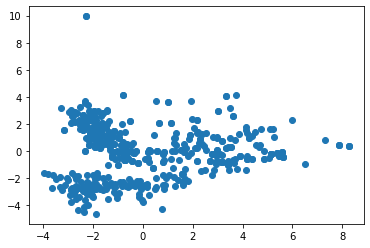

In [148]:
# Import whatever libraries, modules, etc. you may need here.

import scipy as sp
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

X =  alldf[features]
Y = alldf["Surface"]

X = X.apply(sp.stats.zscore) # z-standardization


#PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
plt.figure()
plt.scatter(X_r[:,0],X_r[:,1])
plt.show()

In [149]:
Y

0      Wet Asphalt
1      Wet Asphalt
2      Wet Asphalt
3      Wet Asphalt
4      Wet Asphalt
          ...     
664    Dry Asphalt
665    Dry Asphalt
666    Dry Asphalt
667    Dry Asphalt
668    Dry Asphalt
Name: Surface, Length: 554, dtype: object

In [150]:
Y = pd.factorize(Y)[0]

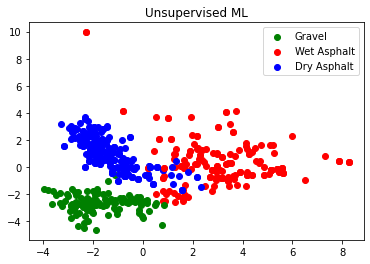

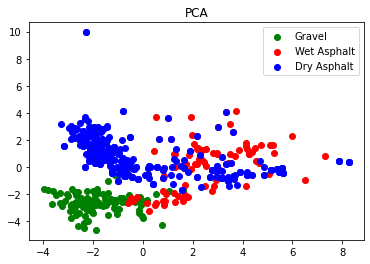

Rand score: 0.5564256224469758


In [152]:


# clustering with ward method
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
clustering_labels = clustering.labels_

# PCA
pca=PCA(n_components=3)
X_r = pca.fit_transform(X)


plt.figure()
# plot the predicted clusters 
for i in range(len(clustering_labels)):
    labels = list(set(clustering_labels))
    if clustering_labels[i] == labels[2]:
        plt.scatter(X_r[i,0],X_r[i,1], color='g', label="Gravel")
        
    if clustering_labels[i] == labels[0]:
        plt.scatter(X_r[i,0],X_r[i,1], color='r', label="Wet Asphalt")
    if clustering_labels[i] == labels[1]:
        plt.scatter(X_r[i,0],X_r[i,1], color='b', label="Dry Asphalt")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Unsupervised ML")
plt.show()

plt.figure()
# plot the correct types
for i in range(len(Y)):
    labels = list(set(Y))
    if Y[i] == labels[0]:
        plt.scatter(X_r[i,0],X_r[i,1], color='g', label="Gravel")
    if Y[i] == labels[1]:
        plt.scatter(X_r[i,0],X_r[i,1], color='r', label="Wet Asphalt")
    if Y[i] == labels[2]:
        plt.scatter(X_r[i,0],X_r[i,1], color='b', label="Dry Asphalt")
        
plt.title("PCA")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

rand = adjusted_rand_score(Y, clustering_labels)
print('Rand score:', rand)


# Machine learning for only asphalt recordings

### These should be recorded at fairly similar speeds.

In [256]:
aspdf = pd.concat([tdrydf, waspdf])

aspdf = aspdf.dropna()

X = aspdf[features]
y = aspdf["Surface"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=None)

# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)



# Extra trees classifier

forestclf = ExtraTreesClassifier(n_estimators = 500)

forestclf.fit(x_train, y_train)

y_pred_forest = forestclf.predict(x_test)


# SVC

#Create a svm Classifier
clf = sklearn.svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(x_test)


# Random Forest

rforestclf = RandomForestClassifier(n_estimators = 500)

rforestclf.fit(x_train, y_train)

y_pred_rforest = rforestclf.predict(x_test)


# Decision tree

treeclf = tree.DecisionTreeClassifier()
treeclf = clf.fit(x_train, y_train)
y_pred_tree = rforestclf.predict(x_test)

# Naive bayes

gnb = GaussianNB()
nbclf = gnb.fit(x_train, y_train)
y_pred_nb = nbclf.predict(x_test)

KNN confusion matrix


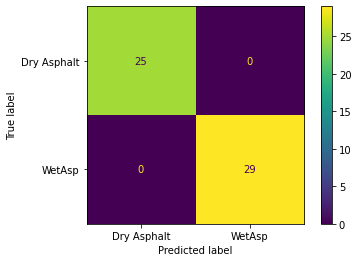

SVC confusion matrix


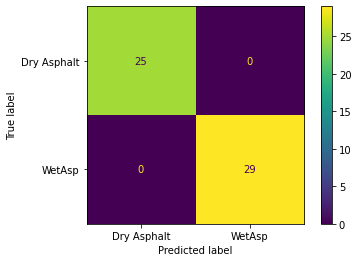

Decision tree classifier confusion matrix


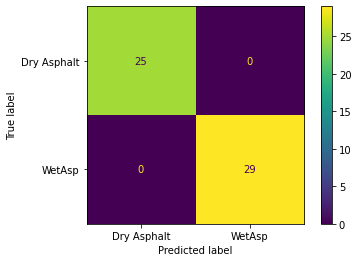

Random forest classifier confusion matrix


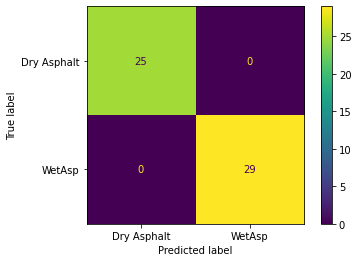

Extra trees classifier confusion matrix


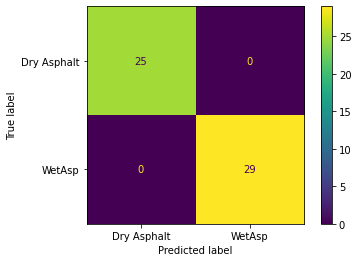

NaiveBayes classifier confusion matrix


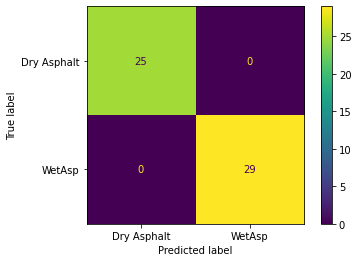

In [257]:
#%matplotlib inline

print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)
plt.show()


print("SVC confusion matrix")
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

print("Decision tree classifier confusion matrix")
plot_confusion_matrix(treeclf, x_test, y_test)
plt.show()

print("Random forest classifier confusion matrix")
plot_confusion_matrix(rforestclf, x_test, y_test)
plt.show()

print("Extra trees classifier confusion matrix")
plot_confusion_matrix(forestclf, x_test, y_test)
plt.show()

print("NaiveBayes classifier confusion matrix")
plot_confusion_matrix(nbclf, x_test, y_test)
plt.show()

In [258]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy knn: ", np.round(accuracy_score(y_test, y_pred_knn),2))
print("Accuracy svc: ", np.round(accuracy_score(y_test, y_pred_svc),2))
print("Accuracy Tree : ", np.round(accuracy_score(y_test, y_pred_tree),2))
print("Accuracy Random forest : ", np.round(accuracy_score(y_test, y_pred_rforest),2))
print("Accuracy Extra Trees : ", np.round(accuracy_score(y_test, y_pred_forest),2))

print("----------")

print("Precision knn: ", np.round(precision_score(y_test, y_pred_knn, average='macro'),2))
print("Precision svc: ", np.round(precision_score(y_test, y_pred_svc, average = 'macro'),2))
print("Precision Tree: ", np.round(precision_score(y_test, y_pred_tree, average = 'macro'),2))
print("Precision Random Forest: ", np.round(precision_score(y_test, y_pred_rforest, average = 'macro'),2))
print("Precision trees: ", np.round(precision_score(y_test, y_pred_forest, average = 'macro'),2))

print("----------")

print("Recall knn: ", np.round(recall_score(y_test, y_pred_knn, average = 'macro'),2))
print("Recall svc: ", np.round(recall_score(y_test, y_pred_svc, average = 'macro'),2))     
print("Recall tree: ", np.round(recall_score(y_test, y_pred_tree, average = 'macro'),2))  
print("Recall forest: ", np.round(recall_score(y_test, y_pred_rforest, average = 'macro'),2))     
print("Recall trees: ", np.round(recall_score(y_test, y_pred_forest, average = 'macro'),2)) 

print("----------")
 
print("F1 knn: ", np.round(f1_score(y_test, y_pred_knn, average = 'macro'),2))
print("F1 svc: ", np.round(f1_score(y_test, y_pred_svc, average = 'macro'),2))            
print("F1 tree: ", np.round(f1_score(y_test, y_pred_tree, average = 'macro'),2))  
print("F1 forest: ", np.round(f1_score(y_test, y_pred_rforest, average = 'macro'),2))  

print("F1 trees: ", np.round(f1_score(y_test, y_pred_forest, average = 'macro'),2))  

Accuracy knn:  1.0
Accuracy svc:  1.0
Accuracy Tree :  1.0
Accuracy Random forest :  1.0
Accuracy Extra Trees :  1.0
----------
Precision knn:  1.0
Precision svc:  1.0
Precision Tree:  1.0
Precision Random Forest:  1.0
Precision trees:  1.0
----------
Recall knn:  1.0
Recall svc:  1.0
Recall tree:  1.0
Recall forest:  1.0
Recall trees:  1.0
----------
F1 knn:  1.0
F1 svc:  1.0
F1 tree:  1.0
F1 forest:  1.0
F1 trees:  1.0


In [196]:
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy knn:', round(np.mean(scores)*100,1), '%')


model = sklearn.svm.SVC(kernel='linear') 
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy svc:', round(np.mean(scores)*100,1), '%')


model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
print('Accuracy tree:', round(np.mean(scores)*100,1), '%')


# model = RandomForestClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
# print('Accuracy forest:', round(np.mean(scores)*100,1), '%')



# model = ExtraTreesClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

# print('Accuracy extra trees:', round(np.mean(scores)*100,1), '%')

Accuracy knn: 100.0 %
Accuracy svc: 100.0 %
Accuracy tree: 100.0 %


### Really good results, considering these are recorded at the same speeds. 

In [169]:
alldf

,Surface,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf,STD,STDf
0,Wet Asphalt,0.636991,-0.909537,-1.776822,-1.970302,-1.436763,-1.451934,-0.277799,-0.296562,-0.671288,-0.752975,-0.932151,-0.909537
1,Wet Asphalt,0.179694,-0.795452,-1.609772,-1.678002,-1.602796,-1.544345,-0.489709,-0.406159,-1.160694,-1.059778,-0.775480,-0.795452
2,Wet Asphalt,0.122326,-0.674255,-1.489207,-1.564362,-1.332246,-1.373932,-0.144402,-0.204052,-0.564559,-0.896966,-0.652589,-0.674255
3,Wet Asphalt,-0.159926,-0.517573,-1.640515,-1.721935,-1.604402,-1.497758,-0.491759,-0.350907,-1.145385,-0.828780,-0.448782,-0.517573
4,Wet Asphalt,-0.238222,-0.523400,-1.795157,-1.823078,-1.660792,-1.546567,-0.563729,-0.408794,-1.130075,-0.932176,-0.415016,-0.523400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Dry Asphalt,1.137249,-0.968632,1.020432,0.982384,0.498121,0.390345,0.129511,-0.006529,0.326647,0.353976,-1.040439,-0.968632
665,Dry Asphalt,0.614169,-0.435030,1.026914,0.950166,0.524241,0.449193,0.165181,0.068150,0.261300,0.276181,-0.497996,-0.435030
666,Dry Asphalt,-0.593662,0.207291,0.435572,0.454602,-0.228514,-0.280964,-0.862822,-0.858418,-0.584690,-0.680135,0.225667,0.207291
667,Dry Asphalt,-0.641654,0.622580,0.765412,0.746903,-0.042689,-0.086110,-0.609049,-0.611148,-0.694372,-0.673102,0.621277,0.622580


In [253]:
sdf = adf.dropna()

In [248]:
graveldf22 = graveldf2[fts]

graveldf12 = graveldf[fts]

waspdf2 = waspdf[fts]

drydf2 = drydf[fts]

adf = pd.concat([waspdf2, graveldf12, graveldf22, drydf2])

adf

,RMS,RMSf,Spec,Specf,ZC,ZCf,Specslo,Specslof,Specspr,Specsprf,STD,STDf,Surface
0,29.546131,1023.227026,936.116277,1018.407771,7470.0,8387.0,-1.136291e-09,-1.127022e-09,1641.800213,1592.380153,1165.214212,1023.227026,WetAsp
1,23.158067,1283.379764,869.158982,980.920178,8372.0,9884.0,-1.143832e-09,-1.131245e-09,1428.056723,1453.218214,1536.434588,1283.379763,WetAsp
2,22.356680,1559.749380,978.265482,1050.050716,9023.0,10466.0,-1.131544e-09,-1.123459e-09,1688.413169,1527.067657,1827.613507,1559.749375,WetAsp
3,18.413845,1917.039422,868.511381,999.818919,8206.0,9659.0,-1.143905e-09,-1.129116e-09,1434.742860,1557.996016,2310.517279,1917.039352,WetAsp
4,17.320115,1903.750157,845.770818,980.018609,7371.0,9141.0,-1.146466e-09,-1.131346e-09,1441.429068,1511.096731,2390.523797,1903.750146,WetAsp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,36.534334,888.469033,1716.408648,1765.754351,22574.0,23509.0,-1.121796e-09,-1.115849e-09,2077.639124,2094.478887,908.634971,888.469033,DryAsp
665,29.227326,2105.265017,1726.941985,1789.627193,22609.0,23344.0,-1.120526e-09,-1.112972e-09,2049.099301,2059.192042,2193.910625,2105.265017,DryAsp
666,12.354906,3569.975285,1423.374044,1493.428487,19416.0,20806.0,-1.157110e-09,-1.148668e-09,1679.621230,1625.419419,3908.569348,3569.975225,DryAsp
667,11.684496,4516.976878,1498.312835,1572.473819,21197.0,22303.0,-1.148079e-09,-1.139142e-09,1631.718617,1628.609637,4845.935116,4516.976775,DryAsp


In [250]:
fig = px.scatter(adf, x="ZCf", y="Spec", color="Surface")
fig.show()

In [198]:
gdf = graveldf
gdf["Surface"] = "G1"

gdf2 = graveldf2
gdf2["Surface"] = "G2"


gdf = pd.concat([gdf, gdf2])

gdf = gdf.dropna()

gdf

,Surface,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf,STD,STDf,Rhythm
1,G1,51.052199,370.821307,16049.0,20817.0,1776.562713,1948.456806,-1.041633e-09,-1.022273e-09,2229.694097,2250.919703,476.895541,370.821307,G1
2,G1,33.457894,634.612336,10548.0,13514.0,1328.007168,1514.384964,-1.092153e-09,-1.071162e-09,1956.645926,2003.004965,844.475609,634.612329,G1
3,G1,28.178588,889.357740,11494.0,14074.0,1467.927174,1612.248922,-1.076394e-09,-1.060139e-09,2023.599560,2037.077885,1082.974500,889.357734,G1
4,G1,32.018604,807.805273,11281.0,13145.0,1304.356898,1441.542442,-1.094817e-09,-1.079366e-09,1857.789793,1916.264282,938.817379,807.805270,G1
5,G1,32.636435,722.625523,11877.0,14399.0,1432.873919,1613.936793,-1.080342e-09,-1.059949e-09,2026.102258,2100.303256,897.320860,722.625520,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,G2,9.644369,4871.941381,18369.0,20154.0,1966.229273,2081.387942,-1.091689e-09,-1.077812e-09,2752.674709,2789.271224,5389.568104,4871.941381,G2
68,G2,9.759560,4730.318885,18495.0,20196.0,2192.178227,2318.908897,-1.064460e-09,-1.049187e-09,3044.665498,3086.418993,5269.284526,4730.318836,G2
69,G2,6.779926,4685.761166,19012.0,21196.0,1813.300934,1934.227518,-1.110119e-09,-1.095546e-09,2465.307969,2503.431501,5333.183836,4685.761015,G2
70,G2,18.854980,2707.436389,19408.0,21020.0,1896.577976,2000.192952,-1.100083e-09,-1.087596e-09,2504.085541,2514.676703,2994.532132,2707.436335,G2


In [201]:
fig = px.scatter(gdf, x="RMSf", y="Spec", color="Surface")
fig.show()

In [199]:


X = gdf[features]
y = gdf["Surface"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=None)

# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)



# Extra trees classifier

forestclf = ExtraTreesClassifier(n_estimators = 500)

forestclf.fit(x_train, y_train)

y_pred_forest = forestclf.predict(x_test)


# SVC

#Create a svm Classifier
clf = sklearn.svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(x_test)


# Random Forest

rforestclf = RandomForestClassifier(n_estimators = 500)

rforestclf.fit(x_train, y_train)

y_pred_rforest = rforestclf.predict(x_test)


# Decision tree

treeclf = tree.DecisionTreeClassifier()
treeclf = clf.fit(x_train, y_train)
y_pred_tree = rforestclf.predict(x_test)

# Naive bayes

gnb = GaussianNB()
nbclf = gnb.fit(x_train, y_train)
y_pred_nb = nbclf.predict(x_test)

KNN confusion matrix


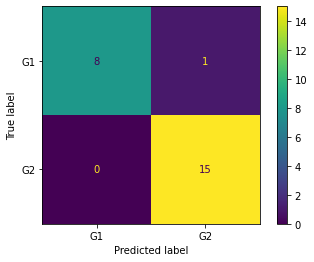

SVC confusion matrix


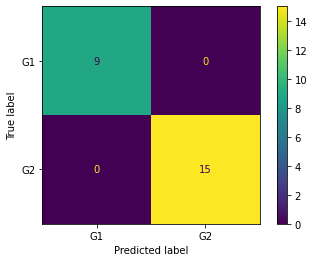

Decision tree classifier confusion matrix


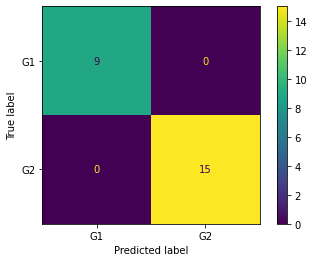

Random forest classifier confusion matrix


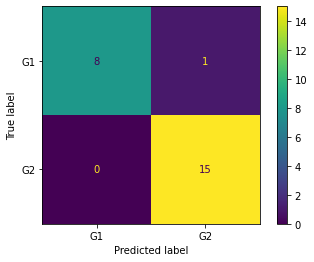

Extra trees classifier confusion matrix


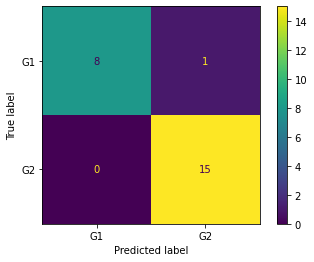

NaiveBayes classifier confusion matrix


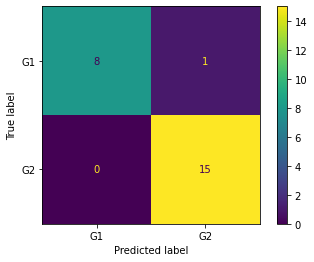

In [200]:
#%matplotlib inline

print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)
plt.show()


print("SVC confusion matrix")
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

print("Decision tree classifier confusion matrix")
plot_confusion_matrix(treeclf, x_test, y_test)
plt.show()

print("Random forest classifier confusion matrix")
plot_confusion_matrix(rforestclf, x_test, y_test)
plt.show()

print("Extra trees classifier confusion matrix")
plot_confusion_matrix(forestclf, x_test, y_test)
plt.show()

print("NaiveBayes classifier confusion matrix")
plot_confusion_matrix(nbclf, x_test, y_test)
plt.show()